In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates
plt.style.use('ggplot')
%matplotlib inline

In [54]:
# read excel file
df = pd.read_excel('C:/Anaconda3/projects/oled/oled.xlsx', sheetname='phosphor_model')
df = df[list(df.columns)[1:-6] + ['cd/A']]
print(df.shape)
df.head()

(136, 32)


,homo_HIL,thickness_HIL,lumo_HTL1,homo_HTL1,thickness_HTL1,lumo_HTL2,homo_HTL2,thickness_HTL2,lumo_HTL3,homo_HTL3,...,total_ETL_thickness,lumo_ETL1,homo_ETL1,thickness_ETL1,lumo_ETL2,homo_ETL2,thickness_ETL2,cathode_workfunction,thickness_EIL,cd/A
0,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35,2.8,6.2,0,2.8,6.2,35,2.8,10.0,5.0
1,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35,2.8,6.2,0,2.8,6.2,35,2.8,10.0,4.0
2,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35,2.8,6.2,0,2.8,6.2,35,2.8,10.0,9.0
3,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35,2.8,6.2,0,2.8,6.2,35,2.8,10.0,12.0
4,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35,2.8,6.2,0,2.8,6.2,35,2.8,10.0,8.0


In [55]:
#Checking for missing data
NAs = df.isnull().sum()
NAs.sort_values(0, ascending=False)
NAs[NAs > 0]

#drop the missing data
df.dropna(axis=0, inplace=True)
print(df.shape)

(135, 32)


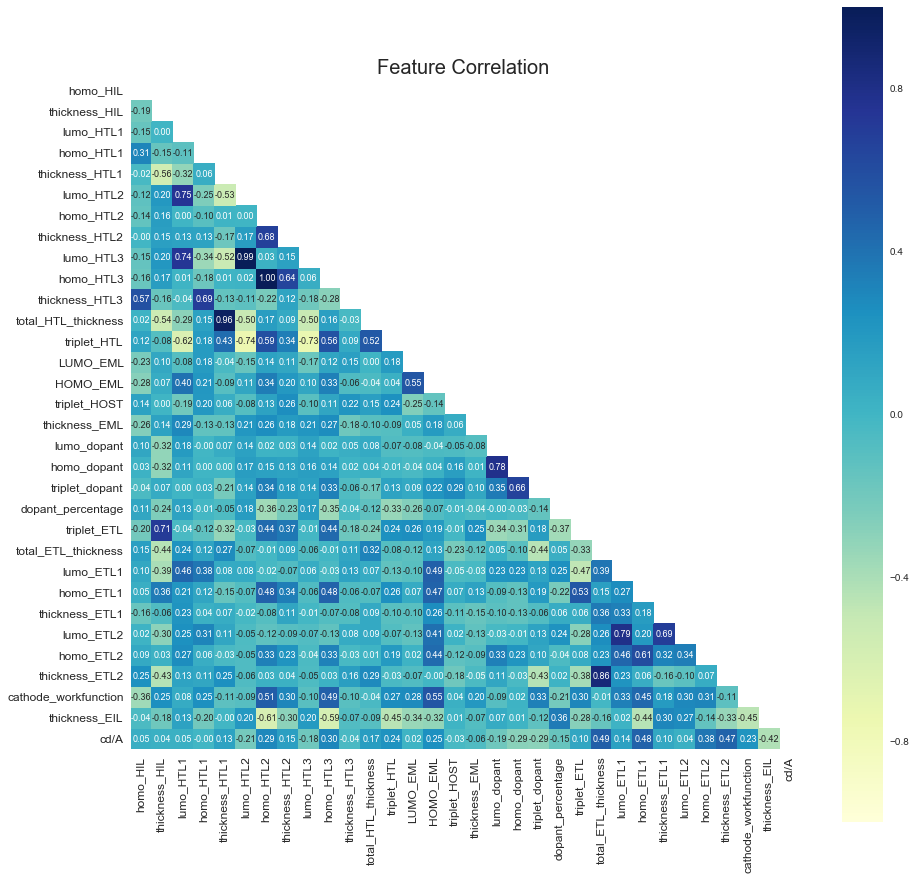

List the features in descending order of their correlation with cd/A:

total_ETL_thickness:   0.49321171793441293
homo_ETL1:   0.4820241028064341
thickness_ETL2:   0.46918260584426413
thickness_EIL:   -0.41644667366698845
homo_ETL2:   0.3821120357132919
homo_HTL3:   0.3038983877031847
homo_HTL2:   0.29484887707140667
triplet_dopant:   -0.29373117935601084
homo_dopant:   -0.286499278129282
HOMO_EML:   0.2501266641852596
triplet_HTL:   0.23860605168165583
cathode_workfunction:   0.23019391446421358
lumo_HTL2:   -0.21028769835047792
lumo_dopant:   -0.1851361060101945
lumo_HTL3:   -0.18251557376579133
total_HTL_thickness:   0.1683897032148528
thickness_HTL2:   0.14916438254443515
dopant_percentage:   -0.14850665428744708
lumo_ETL1:   0.1435162756965366
thickness_HTL1:   0.13416808896307378
triplet_ETL:   0.10453759181237933
thickness_ETL1:   0.0984094437453781
thickness_EML:   -0.056402914875891726
homo_HIL:   0.04920454530300601
lumo_HTL1:   0.04538255515789217
lumo_ETL2:   0.039618903963

In [56]:
X = df[list(df.columns)[:]]

corr = X.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(15, 15))
    sns.heatmap(corr, vmax=1, square=True, cmap="YlGnBu",linecolor='black', mask=mask, annot=True, fmt = '.2f', 
                annot_kws={"size":9})
    plt.yticks(rotation=0,fontsize=12)
    plt.xticks(rotation=90,fontsize=12)
    plt.title('Feature Correlation ',fontsize=20)
    plt.show()

cor_dict = corr['cd/A'].to_dict()
del cor_dict['cd/A']
print("List the features in descending order of their correlation with cd/A:\n")
for ele in sorted(cor_dict.items(), key=lambda x: -abs(x[1])):
    print("{0}:   {1}".format(*ele))

In [57]:
X = df.iloc[:, :-1]
y = df[['cd/A']]
print(X.shape)
X.head()

(135, 31)


,homo_HIL,thickness_HIL,lumo_HTL1,homo_HTL1,thickness_HTL1,lumo_HTL2,homo_HTL2,thickness_HTL2,lumo_HTL3,homo_HTL3,...,triplet_ETL,total_ETL_thickness,lumo_ETL1,homo_ETL1,thickness_ETL1,lumo_ETL2,homo_ETL2,thickness_ETL2,cathode_workfunction,thickness_EIL
0,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35,2.8,6.2,0,2.8,6.2,35,2.8,10.0
1,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35,2.8,6.2,0,2.8,6.2,35,2.8,10.0
2,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35,2.8,6.2,0,2.8,6.2,35,2.8,10.0
3,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35,2.8,6.2,0,2.8,6.2,35,2.8,10.0
4,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35,2.8,6.2,0,2.8,6.2,35,2.8,10.0


In [58]:
y.head()

,cd/A
0,5.0
1,4.0
2,9.0
3,12.0
4,8.0


In [59]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

## Feature Selection

Here we are trying to figure out which feature affect the efficiency the most. Since the data that we have are limited, complex model with many features are not going to give us the best result. Hence we reduce the number of feature thus minimizing the complexity of the model. One way to do this is by using the result from correaltion heatmap above. Another ways is using SelectKBest features in scikit learn and setting f regression and mututal info regression as metrics. 

In [60]:
from sklearn.feature_selection import SelectKBest, f_regression

# find best 10 features using f_regression
select_feature = SelectKBest(f_regression, k=10).fit(X_train, y_train.values.ravel())

scores = select_feature.scores_
names = X_train.columns
scores,names  = zip(*sorted(zip(scores, names), reverse=True))

fmt = '{:<8}{:<20}{}'
print(fmt.format('', 'names', 'scores'))
for i, (name, score) in enumerate(zip(names, scores)):
    print(fmt.format(i, name, score))

        names               scores
0       homo_ETL1           26.241004227026416
1       total_ETL_thickness 22.26607849190295
2       thickness_EIL       21.173179500590624
3       thickness_ETL2      20.92718370471639
4       homo_dopant         12.419658920949837
5       homo_ETL2           10.421860176126533
6       triplet_dopant      9.554194978822402
7       homo_HTL3           8.0648941748326
8       lumo_dopant         7.36251128387543
9       homo_HTL2           7.327846299648378
10      triplet_HTL         6.052209549840693
11      HOMO_EML            5.396332047043947
12      cathode_workfunction4.693303271849373
13      lumo_HTL2           4.595224657510139
14      lumo_HTL3           3.2944795190922833
15      dopant_percentage   2.402259449783705
16      total_HTL_thickness 1.9398792175169393
17      triplet_ETL         1.644339857274891
18      thickness_HTL2      1.516389212412065
19      thickness_HIL       1.3333458900924684
20      thickness_HTL1      1.28708366920

In [61]:
from sklearn.feature_selection import mutual_info_regression

# find best scored features using mutual_info_regression
select_feature = SelectKBest(mutual_info_regression, k=10).fit(X_train, y_train.values.ravel())

scores = select_feature.scores_
names = X_train.columns
scores,names  = zip(*sorted(zip(scores, names), reverse=True))

fmt = '{:<8}{:<20}{}'
print(fmt.format('', 'scores', 'names'))
for i, (name, score) in enumerate(zip(names, scores)):
    print(fmt.format(i, name, score))

        scores              names
0       homo_ETL2           0.44822426399642223
1       triplet_ETL         0.4105722442745341
2       lumo_ETL2           0.4031385706106443
3       thickness_HTL1      0.3269720153108411
4       homo_ETL1           0.325702661837048
5       lumo_ETL1           0.3021737031411531
6       thickness_EIL       0.2990983768361204
7       thickness_ETL2      0.26754002503065655
8       thickness_EML       0.26269571129563607
9       triplet_dopant      0.258524647893396
10      total_HTL_thickness 0.23692111745533584
11      homo_dopant         0.22400850104930448
12      lumo_dopant         0.21318318960642668
13      homo_HTL2           0.21146116826439965
14      total_ETL_thickness 0.19896526286185479
15      thickness_HIL       0.1923085408241363
16      homo_HTL3           0.18904997580641592
17      triplet_HOST        0.16145364571749
18      lumo_HTL2           0.15202123665944023
19      thickness_HTL2      0.12329961889073138
20      lumo_HTL1  

## Model building

Here, I am going to see how some model are doing on this dataset. Most of them are ensemble algorithms because they worked much better than other stand alone models.

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

regressor = RandomForestRegressor(random_state=2)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

kfold = KFold(n_splits=8, shuffle=True, random_state=7)
r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold, scoring='neg_mean_squared_error')
print('MSE scores: ', -mse_scores)
print('mean MSE score: ', -mse_scores.mean())
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.71726132  0.22748217  0.32242053  0.34333936  0.66402007  0.68049406
  0.38803066  0.53499504]
mean R2 score:  0.48475540089 

MSE scores:  [  50.8628071    84.80569617   63.99710418  124.16116719   63.87077174
   77.51028499   65.5514587    87.25704059]
mean MSE score:  77.2520413323
RMSE mean:  8.78931404219 

R-squared test:  0.442958476616
MS Error:  84.8986429733
RMSE:  9.2140459611


In [63]:
importance = regressor.feature_importances_.tolist()
names = list(X)

importance, names = zip(*sorted(zip(importance, names), reverse=True))

fmt = '{:<8}{:<20}{}'
print(fmt.format('', 'column', 'importance'))
for i, (name, coef) in enumerate(zip(names, importance)):
    print(fmt.format(i, name, coef))

        column              importance
0       triplet_ETL         0.2538247263228327
1       triplet_HOST        0.09545303758442467
2       thickness_EIL       0.091469427364992
3       LUMO_EML            0.06553790395329116
4       HOMO_EML            0.06255638093658919
5       thickness_ETL2      0.04905712481603525
6       homo_dopant         0.04265225598067003
7       triplet_dopant      0.0346478200401847
8       lumo_ETL1           0.030969803954790338
9       thickness_HTL1      0.026777475626770908
10      total_HTL_thickness 0.02552255769465577
11      thickness_HIL       0.02441457249325376
12      thickness_EML       0.022290014223958963
13      homo_ETL2           0.021600074452417593
14      total_ETL_thickness 0.01877637932273494
15      lumo_dopant         0.016660206950713356
16      dopant_percentage   0.015652277438727064
17      homo_HTL2           0.015300490949897666
18      lumo_HTL3           0.013956145886486271
19      homo_HTL3           0.012009707128826

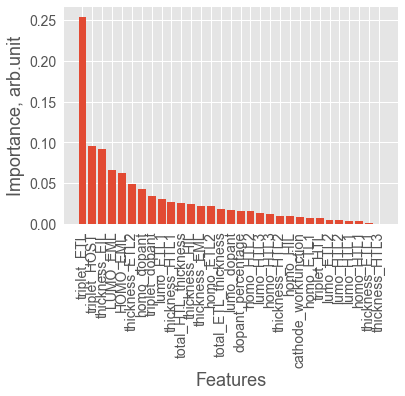

In [64]:
x = np.arange(31)
plt.bar(x, importance)
plt.ylabel('Importance, arb.unit',fontsize=18)
plt.xlabel('Features',fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(x, names, rotation=90, fontsize=14);

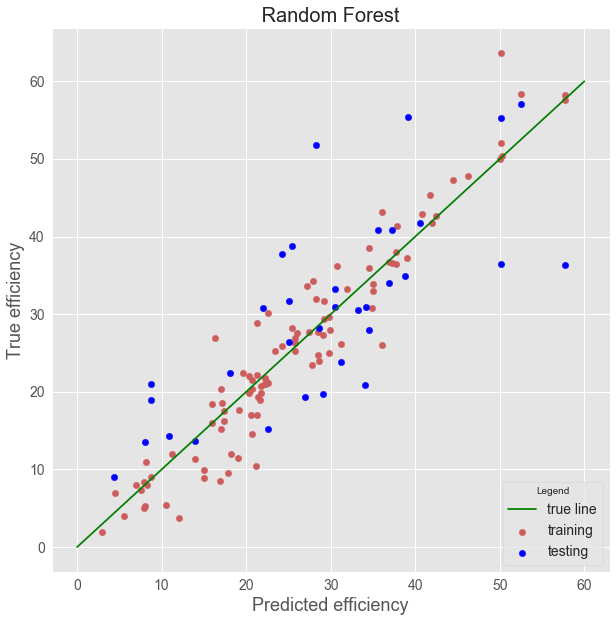

In [65]:
pred_train = regressor.predict(X_train)

plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.scatter(pred_train, y_train, c='indianred', s=40, label='training')
plt.scatter(y_predictions, y_test, c='b', s=40, label='testing')
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.legend(loc=4, frameon=True, title='Legend', fontsize=14);
plt.ylabel('True efficiency', fontsize=18)
plt.xlabel('Predicted efficiency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(' Random Forest ',fontsize=20)
plt.xticks(fontsize=14)
plt.show()

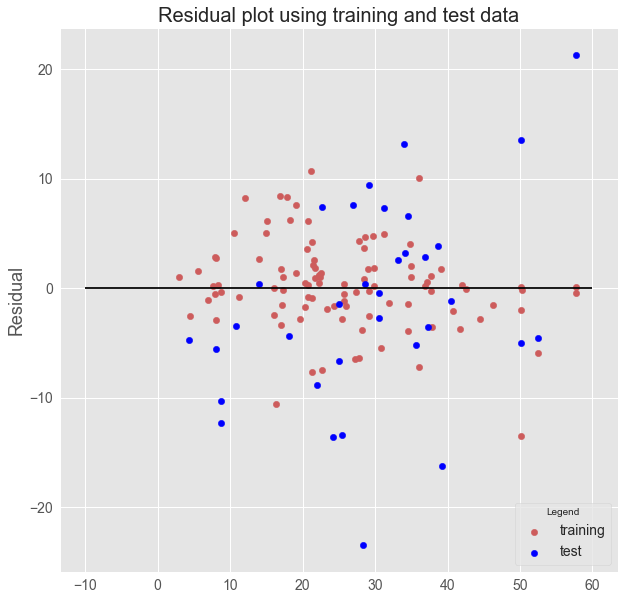

In [66]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train).reshape(len(X_train))-y_train.values.reshape(len(y_train)),
            c='indianred', s=40, label='training')
plt.scatter(regressor.predict(X_test), regressor.predict(X_test).reshape(len(X_test))-np.asarray(y_test).reshape(len(y_test)), 
            c='b', s=40, label ='test')
plt.hlines(y=0, xmin=-10, xmax=60)
plt.title('Residual plot using training and test data', fontsize=20)
plt.ylabel('Residual',fontsize=18 )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=4, frameon=True, title='Legend', fontsize=14);

In [67]:
from xgboost import XGBRegressor, plot_importance
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

# Choose regression algorithm
regressor = XGBRegressor()

regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)

r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold, scoring='neg_mean_squared_error')
print('MSE scores: ', -mse_scores)
print('mean MSE score: ', -mse_scores.mean())
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.69968596  0.10179031  0.19107331  0.25521193  0.71515855  0.69204532
  0.57833881  0.43146216]
mean R2 score:  0.458095792743 

MSE scores:  [  54.02449674   98.60393595   76.40279492  140.82427059   54.14919698
   74.7080165    45.16648892  106.68473222]
mean MSE score:  81.3204916026
RMSE mean:  9.0177875115 

R-squared test:  0.443922947789
MS Error:  84.7516480181
RMSE:  9.20606582738


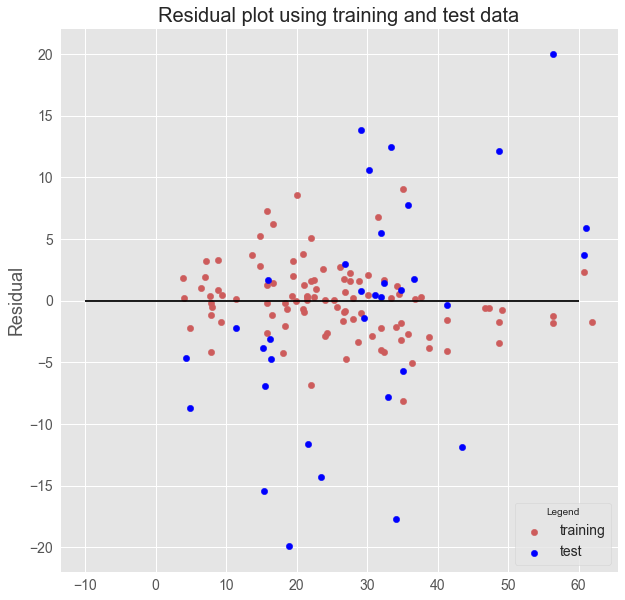

In [68]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train).reshape(len(X_train))-y_train.values.reshape(len(y_train)),
            c='indianred', s=40, label='training')
plt.scatter(regressor.predict(X_test), regressor.predict(X_test).reshape(len(X_test))-np.asarray(y_test).reshape(len(y_test)), 
            c='b', s=40, label ='test')
plt.hlines(y=0, xmin=-10, xmax=60)
plt.title('Residual plot using training and test data', fontsize=20)
plt.ylabel('Residual',fontsize=18 )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=4, frameon=True, title='Legend', fontsize=14);

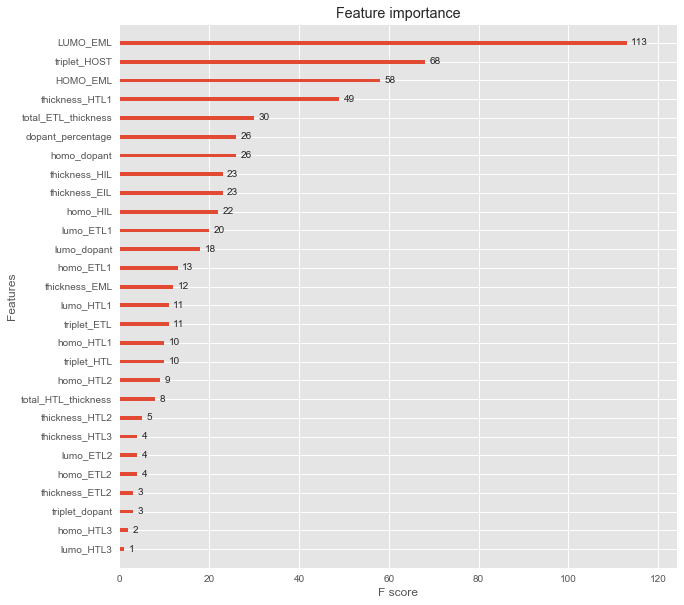

In [69]:
plot_importance(regressor);

In [70]:
from sklearn.ensemble import AdaBoostRegressor

regressor = AdaBoostRegressor(random_state = 2, n_estimators=250, loss='square')
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold, scoring='neg_mean_squared_error')
print('MSE scores: ', -mse_scores)
print('mean MSE score: ', -mse_scores.mean())
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.80291886  0.03494596  0.4426043   0.49317781  0.74635817  0.74422267
  0.50105932  0.42033025]
mean R2 score:  0.523202166856 

MSE scores:  [  35.45358493  105.94199511   52.64579569   95.82976467   48.21805744
   62.05009422   53.44432714  108.77360808]
mean MSE score:  70.294653412
RMSE mean:  8.38419068319 

R-squared test:  0.614307940999
MS Error:  58.7832882113
RMSE:  7.66702603434


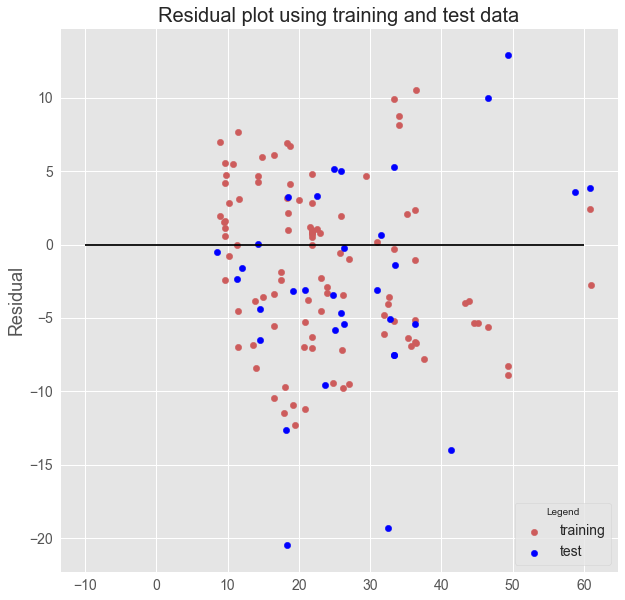

In [71]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train).reshape(len(X_train))-y_train.values.reshape(len(y_train)),
            c='indianred', s=40, label='training')
plt.scatter(regressor.predict(X_test), regressor.predict(X_test).reshape(len(X_test))-np.asarray(y_test).reshape(len(y_test)), 
            c='b', s=40, label ='test')
plt.hlines(y=0, xmin=-10, xmax=60)
plt.title('Residual plot using training and test data', fontsize=20)
plt.ylabel('Residual',fontsize=18 )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=4, frameon=True, title='Legend', fontsize=14);

In [72]:
importance = regressor.feature_importances_.tolist()
names = list(X)

importance, names = zip(*sorted(zip(importance, names), reverse=True))

fmt = '{:<8}{:<20}{}'
print(fmt.format('', 'column', 'importance'))
for i, (name, coef) in enumerate(zip(names, importance)):
    print(fmt.format(i, name, coef))

        column              importance
0       thickness_EIL       0.09952429265428116
1       triplet_HOST        0.09678175001279508
2       thickness_HIL       0.09626896510968613
3       total_ETL_thickness 0.07629406865017106
4       thickness_HTL1      0.06794799095420635
5       LUMO_EML            0.0645754473590986
6       HOMO_EML            0.0610520540828328
7       triplet_ETL         0.049711259187084834
8       dopant_percentage   0.0366443168475807
9       homo_HIL            0.03657738808483022
10      thickness_EML       0.03001792415082166
11      thickness_ETL2      0.029770845862533948
12      triplet_HTL         0.0289988868331544
13      homo_ETL2           0.026857134018030204
14      thickness_HTL2      0.02431250377997478
15      homo_HTL3           0.02199480121730998
16      homo_ETL1           0.021128852190445278
17      thickness_ETL1      0.02103257493006087
18      lumo_ETL1           0.01494672804842565
19      lumo_HTL1           0.013470746507057913


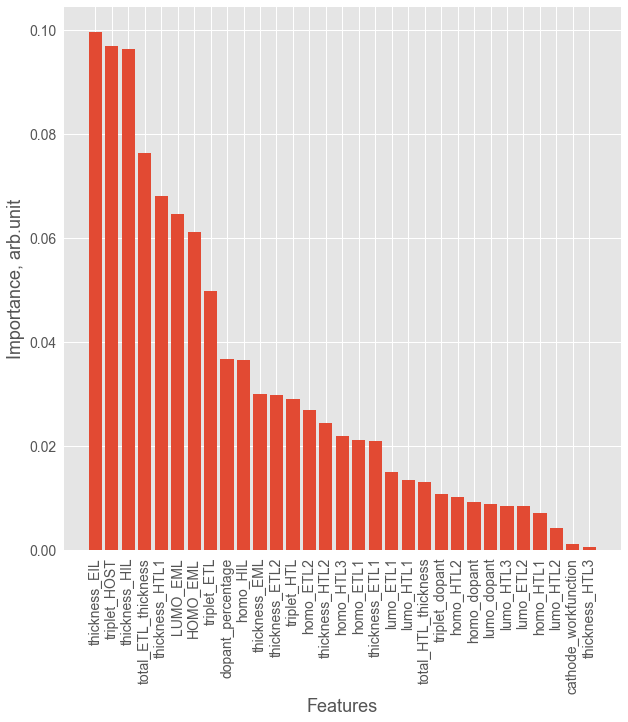

In [73]:
x = np.arange(31)
plt.bar(x, importance)
plt.ylabel('Importance, arb.unit',fontsize=18)
plt.xlabel('Features',fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(x, names, rotation=90, fontsize=14);

In [74]:
# from tpot import TPOTRegressor

# tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2)
# tpot.fit(X_train, y_train)
# print(tpot.score(X_test, y_test))
# tpot.export('tpot_pholed.py')

In [75]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=False, max_features=0.7500000000000001, min_samples_leaf=8,
                                                    min_samples_split=5, n_estimators=100)),
    StackingEstimator(estimator=RandomForestRegressor(bootstrap=True, max_features=0.6500000000000001, min_samples_leaf=1,
                                                      min_samples_split=18, n_estimators=100)),
    RandomForestRegressor(bootstrap=True, max_features=0.1, min_samples_leaf=2, min_samples_split=6, n_estimators=100)
)

exported_pipeline.fit(X_train, y_train.values.ravel())
y_pred = exported_pipeline.predict(X_test)

r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold, scoring='neg_mean_squared_error')
print('MSE scores: ', -mse_scores)
print('mean MSE score: ', -mse_scores.mean())
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.80291886  0.03494596  0.4426043   0.49317781  0.74635817  0.74422267
  0.50105932  0.42033025]
mean R2 score:  0.523202166856 

MSE scores:  [  35.45358493  105.94199511   52.64579569   95.82976467   48.21805744
   62.05009422   53.44432714  108.77360808]
mean MSE score:  70.294653412
RMSE mean:  8.38419068319 

R-squared test:  0.614307940999
MS Error:  58.7832882113
RMSE:  7.66702603434


In [76]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor(random_state = 1)

regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold, scoring='neg_mean_squared_error')
print('MSE scores: ', -mse_scores)
print('mean MSE score: ', -mse_scores.mean())
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.65789458  0.06524616  0.28881291  0.38420342  0.723549    0.69670308
  0.54707807  0.43762524]
mean R2 score:  0.475139057733 

MSE scores:  [  61.54248868  102.61568998   67.17133007  116.43460496   52.55414598
   73.57807098   48.51500089  105.52824541]
mean MSE score:  78.4924471182
RMSE mean:  8.8595963293 

R-squared test:  0.452305346977
MS Error:  83.4740873946
RMSE:  9.13641545654


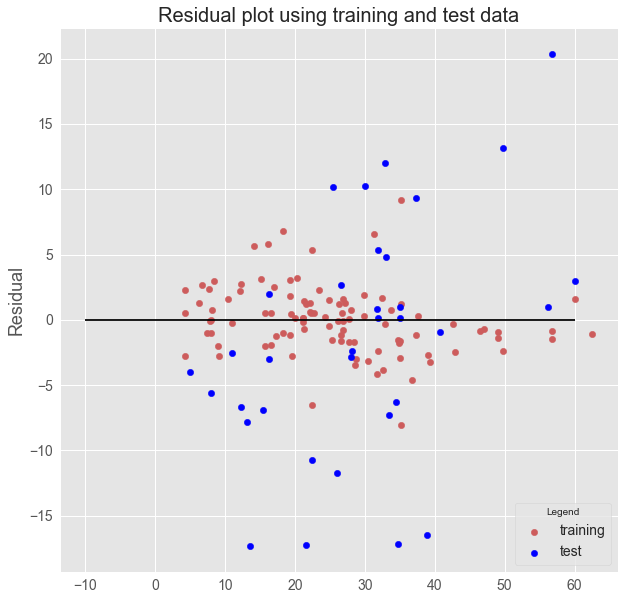

In [77]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train).reshape(len(X_train))-y_train.values.reshape(len(y_train)),
            c='indianred', s=40, label='training')
plt.scatter(regressor.predict(X_test), regressor.predict(X_test).reshape(len(X_test))-np.asarray(y_test).reshape(len(y_test)), 
            c='b', s=40, label ='test')
plt.hlines(y=0, xmin=-10, xmax=60)
plt.title('Residual plot using training and test data', fontsize=20)
plt.ylabel('Residual',fontsize=18 )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=4, frameon=True, title='Legend', fontsize=14);

In [78]:
from sklearn.neural_network import MLPRegressor

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

regressor = MLPRegressor(random_state=12, hidden_layer_sizes=(16, 8), activation='relu', solver='adam', max_iter=100000)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test_scaled)

r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold, scoring='neg_mean_squared_error')
print('MSE scores: ', -mse_scores)
print('mean MSE score: ', -mse_scores.mean())
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.3466654   0.16597105 -0.06060795  0.29663945  0.76549342  0.62506202
  0.50175246 -0.67589237]
mean R2 score:  0.245635434278 

MSE scores:  [ 117.53054571   91.55828239  100.17398802  132.99117017   44.58038866
   90.95777709   53.3700806   314.47709538]
mean MSE score:  118.204916003
RMSE mean:  10.8722084234 

R-squared test:  0.23958240775
MS Error:  911.96794087
RMSE:  30.1988069445


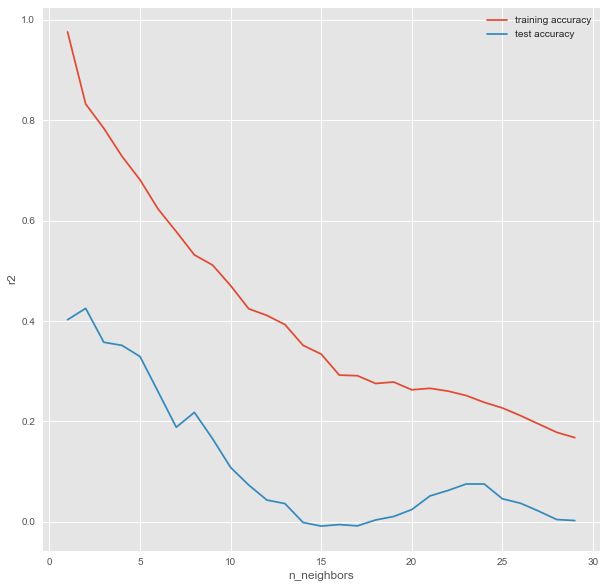

In [79]:
from sklearn.neighbors import KNeighborsRegressor
training_coefficient = []
test_coefficient = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 30)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_coefficient.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_coefficient.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_coefficient, label="training accuracy")
plt.plot(neighbors_settings, test_coefficient, label="test accuracy")
plt.ylabel("r2")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [80]:
regressor = KNeighborsRegressor(n_neighbors=8)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold, scoring='neg_mean_squared_error')
print('MSE scores: ', -mse_scores)
print('mean MSE score: ', -mse_scores.mean())
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.37597846 -0.07502251  0.21310742  0.30961138  0.40982443  0.50399496
  0.33569102  0.36000655]
mean R2 score:  0.304148965086 

MSE scores:  [ 112.25732215  118.01414651   74.32168225  130.53844114  112.19410911
  120.32794042   71.15785003  120.09320237]
mean MSE score:  107.363086748
RMSE mean:  10.3616160297 

R-squared test:  0.218026619719
MS Error:  119.18048483
RMSE:  10.9169814889


In [81]:
X_1 = df[['homo_HIL'] + ['homo_HTL1'] +['homo_HTL2']+ ['homo_HTL3'] +['HOMO_EML'] + ['homo_dopant'] + ['total_HTL_thickness']
       + ['LUMO_EML'] + ['lumo_ETL1'] + ['lumo_ETL2'] +['lumo_dopant'] + ['total_ETL_thickness'] + ['cathode_workfunction'] + 
       ['triplet_dopant'] + ['thickness_EML'] + ['triplet_HOST'] + ['triplet_ETL'] + ['triplet_HTL']]

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y,test_size=0.25, random_state=7)

regressor = RandomForestRegressor(random_state=2)
regressor.fit(X_train_1, y_train_1.values.ravel())
y_predictions_1 = regressor.predict(X_test_1)

# cross val score
r2_scores = cross_val_score(regressor, X_1, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X_1, y.values.ravel(), cv=kfold, scoring='neg_mean_squared_error')
print('MSE scores: ', -mse_scores)
print('mean MSE score: ', -mse_scores.mean())
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test_1, y_test_1))
print('MS Error: ', mean_squared_error(y_test_1, y_predictions_1))
print('RMSE: ', np.sqrt(mean_squared_error(y_test_1, y_predictions_1)))

R2 scores:  [ 0.70162713  0.38589132  0.34793526  0.20545573  0.67977274  0.71238458
  0.39463582  0.38646717]
mean R2 score:  0.476771217625 

MSE scores:  [  53.67529254   67.41580897   61.5872481   150.2321564    60.87614309
   69.77383131   64.84394354  115.12793139]
mean MSE score:  80.4415444187
RMSE mean:  8.96892102868 

R-squared test:  0.562941938636
MS Error:  66.611975504
RMSE:  8.16161598607


In [82]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score

estimator = list(np.arange(10, 400, 10))
parameters = {
                'n_estimators': estimator,
                'loss': ('linear', 'square', 'exponential')
             }
regressor = AdaBoostRegressor(random_state=2)
reg = GridSearchCV(regressor, parameters, verbose=3, scoring='neg_mean_squared_error', cv=kfold, n_jobs=-1)

reg.fit(X_train, y_train.values.ravel())
print('Best score: %0.3f' % reg.best_score_)
print('Best parameters set:')
best_parameters = reg.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))
    
y_predictions = reg.predict(X_test)
print('r2 on test set:', r2_score(y_test, y_predictions))

# scores = cross_val_score(reg, X, y.values.ravel(), cv=kfold)
# print('scores: ', scores)
# print('mean score: ', scores.mean())

Fitting 8 folds for each of 117 candidates, totalling 936 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 936 out of 936 | elapsed:  3.5min finished


Best score: -90.900
Best parameters set:
	loss: 'linear'
	n_estimators: 380
r2 on test set: 0.536342963622


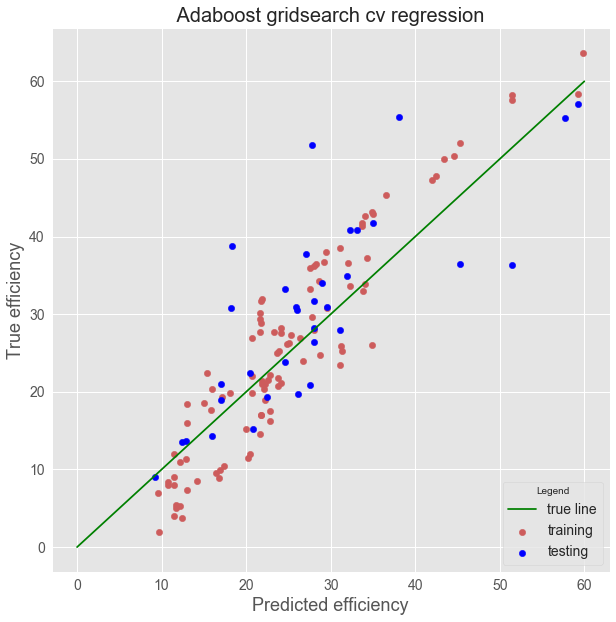

In [83]:
pred_train = reg.predict(X_train)

plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.scatter(pred_train, y_train, c='indianred', s=40, label='training')
plt.scatter(y_predictions, y_test, c='b', s=40, label='testing')
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.legend(loc=4, frameon=True, title='Legend', fontsize=14);
plt.ylabel('True efficiency', fontsize=18)
plt.xlabel('Predicted efficiency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title(' Adaboost gridsearch cv regression ', fontsize=20)
plt.show()